<img style="width: 300px; padding: 0px;" src="Title_Graph.png" alt="title pics"/>


<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Network data with NetworkX </b></p>

<p style="text-align:center; font-size:24px; margin-bottom: 32px;"><b> Satoru Hayasaka, Ph.D.</b></p>


<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>July 2, 2019</b></p>

<hr style="height:5px;border:none" />

# 1. What is a network?
<hr style="height:1px;border:none" />

A network consists of a collection of:

  * **Nodes**: Also known as *vertices*. Nodes represent individual units. A node can be:
     * A person (in a social network)
     * A gene (in a gene expression network)
     * A computer server (in a computer network)
     * And so on...
  * **Edges**: Also known as *arcs* or *connections*. Edges represent relationships between units. An edge can be 
     * A friendship between people (in a social network)
     * A gene-gene association (in a gene expression network) 
     * A cable (in a computer network)
     * And so on...

<img style="width: 600px; padding: 0px;" src="Title_Graph.png" alt="Sample network"/>

<p style="text-align:center; font-size:12px; margin-top: 5px; margin-left:50px; margin-right:50px; margin-bottom:30px"> S&amp;P500 network: Nodes=companies, edges=correlation in stock prices. Visualized by Gephi. </p>


**Network data** describe relationships among individuals. A network is also referred as a **graph**. To examine properties of networks, we use methods based on a branch of mathematics known as *graph theory*.

## Simple example

The **networkX** library has a number of utilities that are useful in handling network data. To demonstrate, let us start out with a simple network.

In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# first, creating a graph
G=nx.Graph()

The function **`Graph`** under **`networkx`** creates a graph object. It is a network containing nodes and edges. Right now, it is empty since we just created. So let's add some nodes.

In [3]:
# adding nodes
G.add_node(1)  # single node
G.add_nodes_from([2,3])  # multiple nodes
G.add_nodes_from(list(range(3,8)))
G.add_node('Boss')

To add a single node, you can use the **`add_node`** method associated with the graph object **`G`**. To add multiple nodes at once, we can add **`add_nodes_from`** method. A node can have a numerical label or a string label when created. To get a list of nodes in `G`, you can use **`nodes()`** method.

In [4]:
# a list of nodes
print(G.nodes())

[1, 2, 3, 4, 5, 6, 7, 'Boss']


Now that we have some nodes, we can introduce edges by connecting some of the nodes. To add a single edge, you can use the **`add_edge`** method associated with `G`. You can use multiple edges at once by using the **`add_edges_from`** method. 

In [5]:
# adding edges
G.add_edge(1,2)  # single edge
G.add_edges_from([(1,2),(1,3),(5,7)])  # multiple edges

We can also do some creative stuff. We can connect nodes (1,2), (2,3), (3,4) and so on.

In [6]:
for iEdge in range(1,7):
    G.add_edge(iEdge,iEdge+1)

If some edges already exist (e.g., (1,2)), then `add_edge` and `add_edges_from` do not alter existing edges. You can use **`nodes()`** to iterate over nodes in a `for` loop too. Here, we are making connections between the `Boss` node with all the other nodes. 

In [7]:
for i in G.nodes():
    if i!='Boss':
        G.add_edge('Boss',i)

To get a list of edges in `G`, you can use the **`edges()`** method.

In [8]:
# a list of edges
print(G.edges())

[(1, 2), (1, 3), (1, 'Boss'), (2, 3), (2, 'Boss'), (3, 4), (3, 'Boss'), (4, 5), (4, 'Boss'), (5, 7), (5, 6), (5, 'Boss'), (6, 7), (6, 'Boss'), (7, 'Boss')]


Say, if you are interested in connections originating from a certain node. Then you can do

In [9]:
# which nodes is Boss connected to
print(G['Boss'])

{1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}}


In [10]:
# how about node 3
print(G[3])

{1: {}, 2: {}, 4: {}, 'Boss': {}}


Now we have a graph `G` with some nodes and edges, we can visualize the graph. The **`draw`** function produces a graph. 

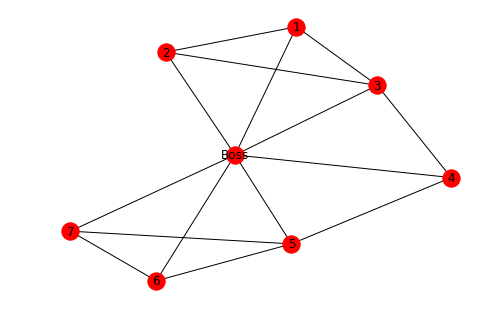

In [11]:
# drawing the graph
nx.draw(G, with_labels=True)
plt.show()

# 2. Network data example
<hr style="height:1px;border:none" />

Now let's take a look at one example of publicly available network data.

## Les Misérables interaction network

This network data set **`lesmis.gml`** is from Mark Newman's [network data repository](http://www-personal.umich.edu/~mejn/netdata/). Each node in this network is a character from Victor Hugo's novel, Les Misérables. Edges represent interactions among characters. As you can imagine, the main character, Valjean, is the center of this network. 

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# loading the Les Miserables network
G = nx.read_gml('lesmis.gml')

Here, we draw the network with the Kamada-Kawai algorithm, implemented as **`kamada_kawai_layout`** function. This algorithm attempts to place nodes so that strongly connected nodes are closer to each other. We provide the graph object **`G`** as the input parameter.

In [13]:
# node placement --- Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G) # positions for all nodes

This function returns the positions of all nodes stored in a dictionary. We use the position information **`pos`** in the functions to draw nodes, edges, and labels.

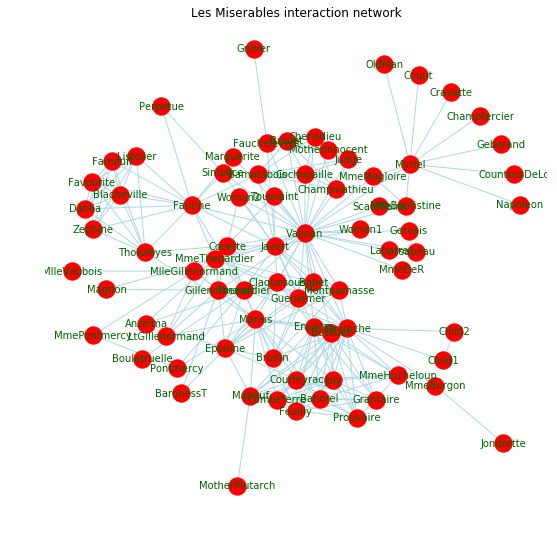

In [14]:
# drawing the graph
plt.figure(figsize=[9,9])
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='DarkGreen')
plt.axis('off')
plt.title('Les Miserables interaction network')
plt.show()

### Network size
Just get a sense of the size of this network, we can calculate the number of nodes and edges.

In [15]:
# Network sizes
print("Number of nodes: %3d" % len(G.nodes()))
print("Number of edges: %3d" % len(G.edges()))

Number of nodes:  77
Number of edges: 254


### Node degrees
The number of connections at each node, known as node degree or simply degree, is a good way to summarize how connected a particular node is. For a graph object, there is a method to determine the degree at each node, called **`degree()`**.

In [16]:
# degree sequence
print(G.degree())

[('Myriel', 10), ('Napoleon', 1), ('MlleBaptistine', 3), ('MmeMagloire', 3), ('CountessDeLo', 1), ('Geborand', 1), ('Champtercier', 1), ('Cravatte', 1), ('Count', 1), ('OldMan', 1), ('Labarre', 1), ('Valjean', 36), ('Marguerite', 2), ('MmeDeR', 1), ('Isabeau', 1), ('Gervais', 1), ('Tholomyes', 9), ('Listolier', 7), ('Fameuil', 7), ('Blacheville', 7), ('Favourite', 7), ('Dahlia', 7), ('Zephine', 7), ('Fantine', 15), ('MmeThenardier', 11), ('Thenardier', 16), ('Cosette', 11), ('Javert', 17), ('Fauchelevent', 4), ('Bamatabois', 8), ('Perpetue', 2), ('Simplice', 4), ('Scaufflaire', 1), ('Woman1', 2), ('Judge', 6), ('Champmathieu', 6), ('Brevet', 6), ('Chenildieu', 6), ('Cochepaille', 6), ('Pontmercy', 3), ('Boulatruelle', 1), ('Eponine', 11), ('Anzelma', 3), ('Woman2', 3), ('MotherInnocent', 2), ('Gribier', 1), ('Jondrette', 1), ('MmeBurgon', 2), ('Gavroche', 22), ('Gillenormand', 7), ('Magnon', 2), ('MlleGillenormand', 7), ('MmePontmercy', 2), ('MlleVaubois', 1), ('LtGillenormand', 4), ('

As you can see, it returns a list of tuples, each corresponding to a node. Now let's determine who are *well-connected* in this network. This is determined by nodes with highest degrees.

In [17]:
# finding the node with high degree
k = [d for n, d in G.degree()]
node = [n for n, d in G.degree()]
sortedNodes = sorted(zip(node, k), key=lambda x: x[1],
                     reverse=True)
snode, sk = zip(*sortedNodes)

The top 5 most connected nodes are:

In [18]:
print(snode[:5])

('Valjean', 'Gavroche', 'Marius', 'Javert', 'Thenardier')


And their degrees:

In [19]:
print(sk[:5])

(36, 22, 19, 17, 16)
